<a href="https://colab.research.google.com/github/GeorgeSherif/NLP-ChatEGP/blob/main/Labelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.1 MB/s eta 0:00:00


In [52]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
df = pd.read_csv('/content/drive/MyDrive/NLP/all-data.csv' ,engine="python", encoding = "ISO-8859-1")

In [11]:
df

,Sentiment,Sentence
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [30]:
sentimentActual = df.get(['Sentiment'])
sentimentActual

,Sentiment
0,neutral
1,neutral
2,negative
3,positive
4,positive
...,...
4841,negative
4842,neutral
4843,negative
4844,negative


In [13]:
df= df.drop(['Sentiment'], axis=1)
df

,Sentence
0,"According to Gran , the company has no plans t..."
1,Technopolis plans to develop in stages an area...
2,The international electronic industry company ...
3,With the new production plant the company woul...
4,According to the company 's updated strategy f...
...,...
4841,LONDON MarketWatch -- Share prices ended lower...
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,Operating profit fell to EUR 35.4 mn from EUR ...
4844,Net sales of the Paper segment decreased to EU...


VADER


In [61]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each article
sentiments = []
for article in df['Sentence']:
    # Get sentiment scores for the article
    scores = sid.polarity_scores(article)
    
    # Classify the sentiment based on the compound score
    if scores['compound'] >= 0.05:
        sentiment = 'positive'
    elif scores['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    # Append the sentiment to the list
    sentiments.append(sentiment)

# Add the sentiment column to the DataFrame
df['sentiment'] = sentiments

# Save the DataFrame with sentiment labels to a new CSV file
df.to_csv('financial_news_with_sentiment.csv', index=False)

In [62]:
sentimentVADER = np.array(sentiments)
sentimentActual = sentimentActual.to_numpy()

AttributeError: ignored

In [59]:
sentimentVADER

array(['Negative', 'Negative', 'Neutral', ..., 'Positive', 'Positive',
       'Neutral'], dtype='<U8')

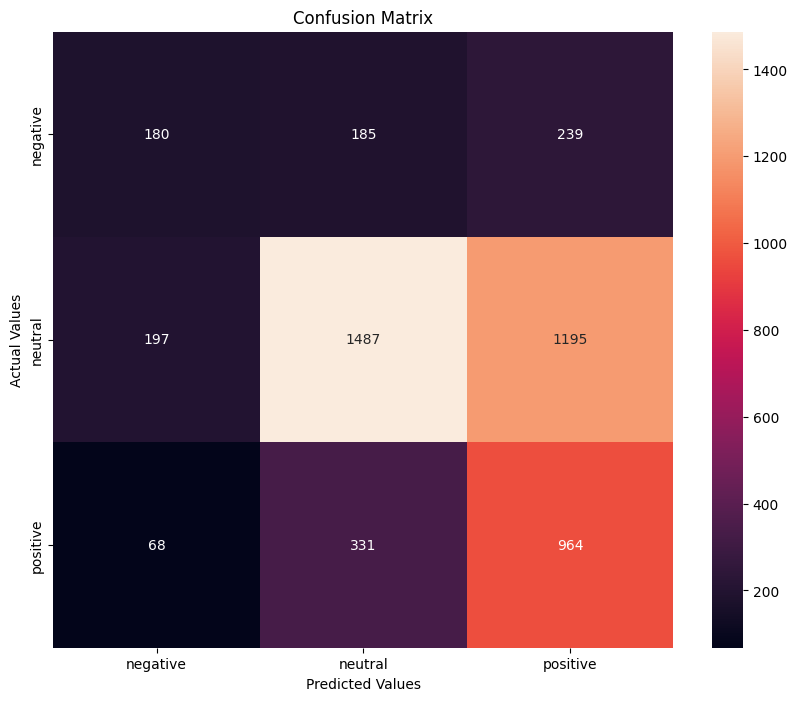

In [66]:
confusion_matrix = metrics.confusion_matrix(sentimentActual, sentimentVADER)
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['negative','neutral','positive'], 
                     columns = ['negative','neutral','positive'])
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()